In [1]:
%matplotlib inline

from IPython.display import HTML

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn-darkgrid')

# Optimizing Logistic Regression with Gradient Descent

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

In [2]:
gif_url = 'https://gist.githubusercontent.com/jjangsangy/466807b8765f64b231661313bd011963/raw/6bcbd1a83bf8a14dfc3609d950622012a5b16658/image.gif'

HTML('<img src="{}">'.format(gif_url))

# Sleep Vs Studied

Say we’re given data on student exam results and our goal is to predict whether a student will pass or fail based on number of hours slept and hours spent studying.

We have two input features `[hours slept, hours studied]` and two output classes: `passed (1)` and `failed (0)`.

In [3]:
df = pd.read_csv('http://scilab.io/wp-content/uploads/2016/07/data_classification.csv',
                 names=['studied', 'slept', 'passed'],
                 dtype={'passed': int}
)

In [4]:
df.head(10)

,studied,slept,passed
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1
5,1.922270,1.331427,0
6,8.978216,0.993438,1
7,6.635603,8.542803,1
8,7.672359,5.416400,1
9,4.866015,2.042671,0


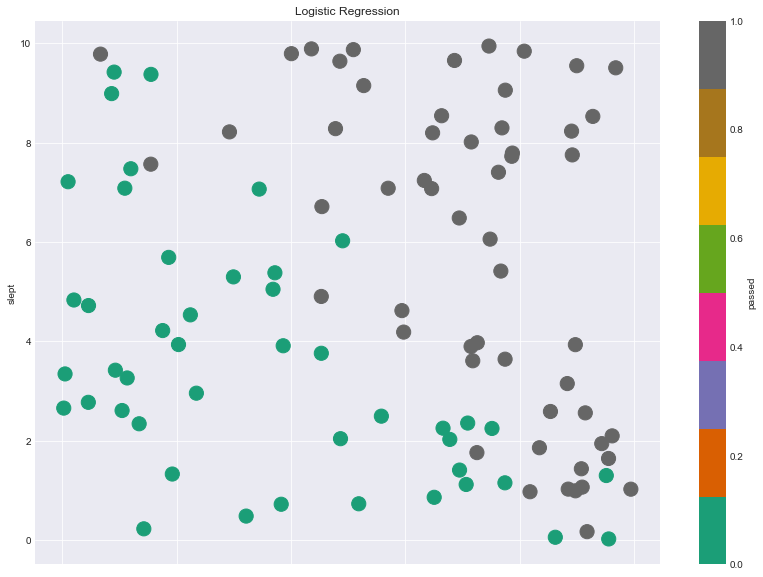

In [5]:
df.plot.scatter(x='studied', y='slept',
                s=200,
                figsize=(14, 10),
                title='Logistic Regression',
                c='passed',
                cmap='Dark2');

# Sigmoid Activation

In order to map predicted values to probabilities, we use the sigmoid function. The function maps any real value into another value between `0` and `1`.

In machine learning, we use sigmoid to map predictions to probabilities.

$$S(z) = \frac{1} {1 + e^{-z}}$$

# Cross Entropy Loss

\begin{eqnarray} 
  C = -\frac{1}{n} \sum_x \left[y \ln a + (1-y ) \ln (1-a) \right],
\tag{57}\end{eqnarray}

In [6]:
def sigmoid(z, deriv=False):
    if deriv:
        return sigmoid(z) * (1 - sigmoid(z))
    else:
        return 1.0 / (1 + np.exp(-z))

def cross_entropy_loss(features, target, weights):
    scores = np.dot(features, weights)
    return -(1.0 / float(len(scores))) * (np.sum(target*scores - np.log(1 + np.exp(scores))))

# Gradient Descent

In [8]:
def logistic_regression(features, target, num_steps=1000, learning_rate=1e-4, add_intercept=True):
    if add_intercept:
        features = np.hstack((np.ones((features.shape[0], 1)), features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

    return weights


def predict(X_train, weights):
    if weights.shape[0] == 3:
        X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    return np.round(sigmoid(np.dot(X_train, weights)))

# Run Logistic Regression

In [ ]:
X_train = df[['studied', 'slept']].values
y_train = df['passed'].values

weights = logistic_regression(X_train, y_train, num_steps=800, learning_rate=0.004)

# Compare vs Scikit Learn

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C=1e15)
clf.fit(X_train, y_train);

In [12]:
preds = predict(X_train, weights)

print('Accuracy logit:   {}'.format((preds == y_train).sum().astype(float) / len(preds)))
print('Accuracy sklearn: {}'.format(clf.score(X_train, y_train)))

Accuracy logit:   0.91
Accuracy sklearn: 0.89


# Plotting Functions

In [15]:
def plot_figure(features, weights, target, epoch=0):
    with plt.xkcd():
        plt.figure(figsize=(14, 10))
        plt.scatter(features[:, 1], features[:, 2], alpha=0.8, s=200, c=target, cmap='Dark2')
        plt.grid(b=True, color='r')
        ex1 = np.linspace(0, max(features[:, 2]))
        ex2 = -(weights[1] * ex1 + weights[0]) / weights[2]
        plt.xlim(xmax=max(features[:, 1])+1)
        plt.ylim(ymax=max(features[:, 2])+1)
        plt.title('Logistic Regression')
        plt.xlabel('Studied')
        plt.ylabel('Slept')
        plt.plot(ex1, ex2, color='r', label='decision boundary', linewidth=8, alpha=0.8)
        plt.text(0.2, 9, 'Log Loss: {:.3f}'.format(cross_entropy_loss(features, target, weights)), fontsize=20)
        plt.text(0.2, 10, '$\\frac{1} {1 + e^\\frac{-(%+.2f%+.2fx)} {%+.2f}}$' % (weights[0], weights[1], weights[2]), fontsize=30)
        plt.savefig('{:05d}.png'.format(epoch), bbox_inches=0.0)
        plt.show()

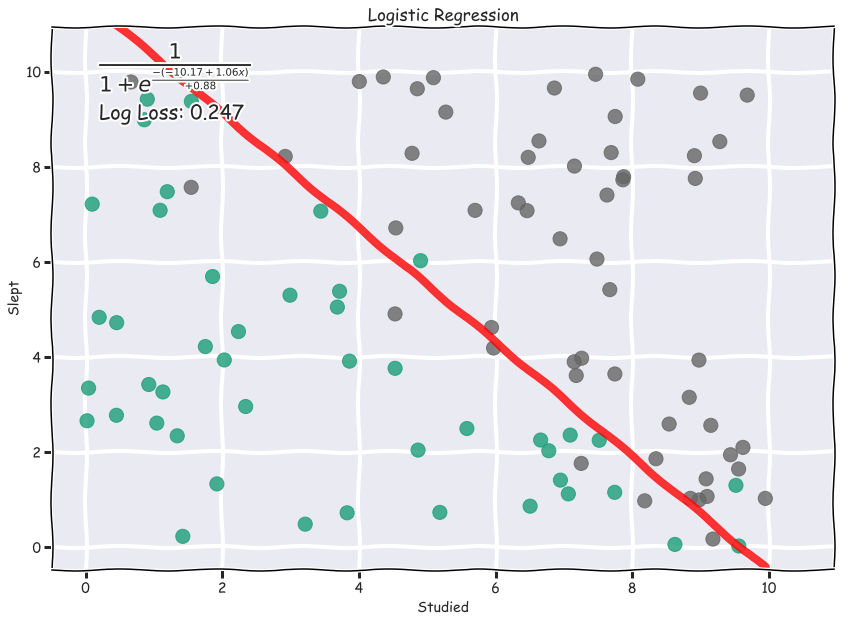

In [14]:
plot_figure(np.hstack((np.ones((X_train.shape[0], 1)), X_train)), weights, y_train)